# Proyecto Integrador Opción 2. (Mercado Automotor):
------------------

Se requiere crear un modelo de regresión capaz de pronosticar el precio de un vehículo a partir de las características del mismo. Dichas características corresponden por ejemplo al consumo de combustible, tamaño de motor, peso del vehículo, clilindraje, etc. de un dataset con datos recopilados en el mercado actual. A demás se requiere un modelo de clasificación que de acuerdo a sus características puedo determinar si el vehículo será gamma alta (vehículo costoso) o gamma baja (vehículo económico).

A continuación se realizan pruebas del modelo de supervisado machine learning KNN (K-Nearest-Neighbor) para la creación de ambos modelos.

#### Modelo KNN usando SelectKBest (mejores características para reducir dimensionalidad):

1. Importar Librerías necesarias para los modelos KNN-Clasificador y KNN-Regresor:

In [2]:
# Tratamientos de Datos:
#---------------------------------------------------------------------------------------
import pandas as pd
import numpy as np

# Librerías para el modelo KNN:
#----------------------------------------------------------------------------------------------------------------------------

# Para regresión y clasificación:
from sklearn.feature_selection import SelectKBest, f_classif    # Reducción de variables
from sklearn.model_selection import train_test_split            # Entrenamiento de modelos
from sklearn.preprocessing import StandardScaler                # Escalar valores numéricos
from sklearn.model_selection import GridSearchCV                # Búsqueda de mejores hiperparámetros
import warnings                                                 # Para ignorar advertencias

# Para clasificación:
from sklearn.neighbors import KNeighborsClassifier              # Modelo KNN para clasificación (vecinos más cercanos)
from sklearn.metrics import accuracy_score, recall_score        # medidas de rendimiento
from sklearn.metrics import confusion_matrix                    # medidas de rendimiento

# Para regresión:
from sklearn.neighbors import KNeighborsRegressor               # Modelo KNN para regresión (vecinos más cercanos)
from sklearn.metrics import mean_squared_error, r2_score        # medidas de rendimiento
from sklearn.feature_selection import f_regression              # Para buscar mejores parámetros

# Validación de los modelos (validación cruzada):
#----------------------------------------------------------------------------------------------------------------------------

from sklearn.model_selection import cross_val_score             # Validación cruzada
from sklearn.model_selection import LeaveOneOut                 # Validación cruzada
from sklearn.model_selection import KFold                       # Validación cruzada 

# Gráficos:
#----------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

2. Tratamiento de datos:
   
 Los datos han sido depurados desde el archivo "ETLPropuesta2.ipynb".
 Se tienen dos variables objetivo ('price' para el modelo de regresión y 'price_category' para el modelo de clasificación).

In [3]:
# Visualización:

#Se identifica que los datos numéricos están escalados y que está creada una categoría de precio que divide los vehículos entre Costosos y Económicos.

data = pd.read_csv('..\DatasetForML.csv')
data.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_OHCV,enginetype_ROTOR,fuelsystem_2BBL,fuelsystem_4BBL,fuelsystem_IDI,fuelsystem_MFI,fuelsystem_MPFI,fuelsystem_SPDI,fuelsystem_SPFI,price_category
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,1,0,0,1
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,1,0,0,1
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,1,0,0,0,0,0,1,0,0,1
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,1,0,0,1
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,1,0,0,1


In [4]:
print('Número de datos por encima de la mediana:', len(data[data['price'] > data['price'].median()]))
print('Número de datos igual a la mediana:', len(data[data['price'] == data['price'].median()]))
print('Número de datos por debajo de la mediana:', len(data[data['price'] < data['price'].median()]))

Número de datos por encima de la mediana: 102
Número de datos igual a la mediana: 1
Número de datos por debajo de la mediana: 102


<Axes: >

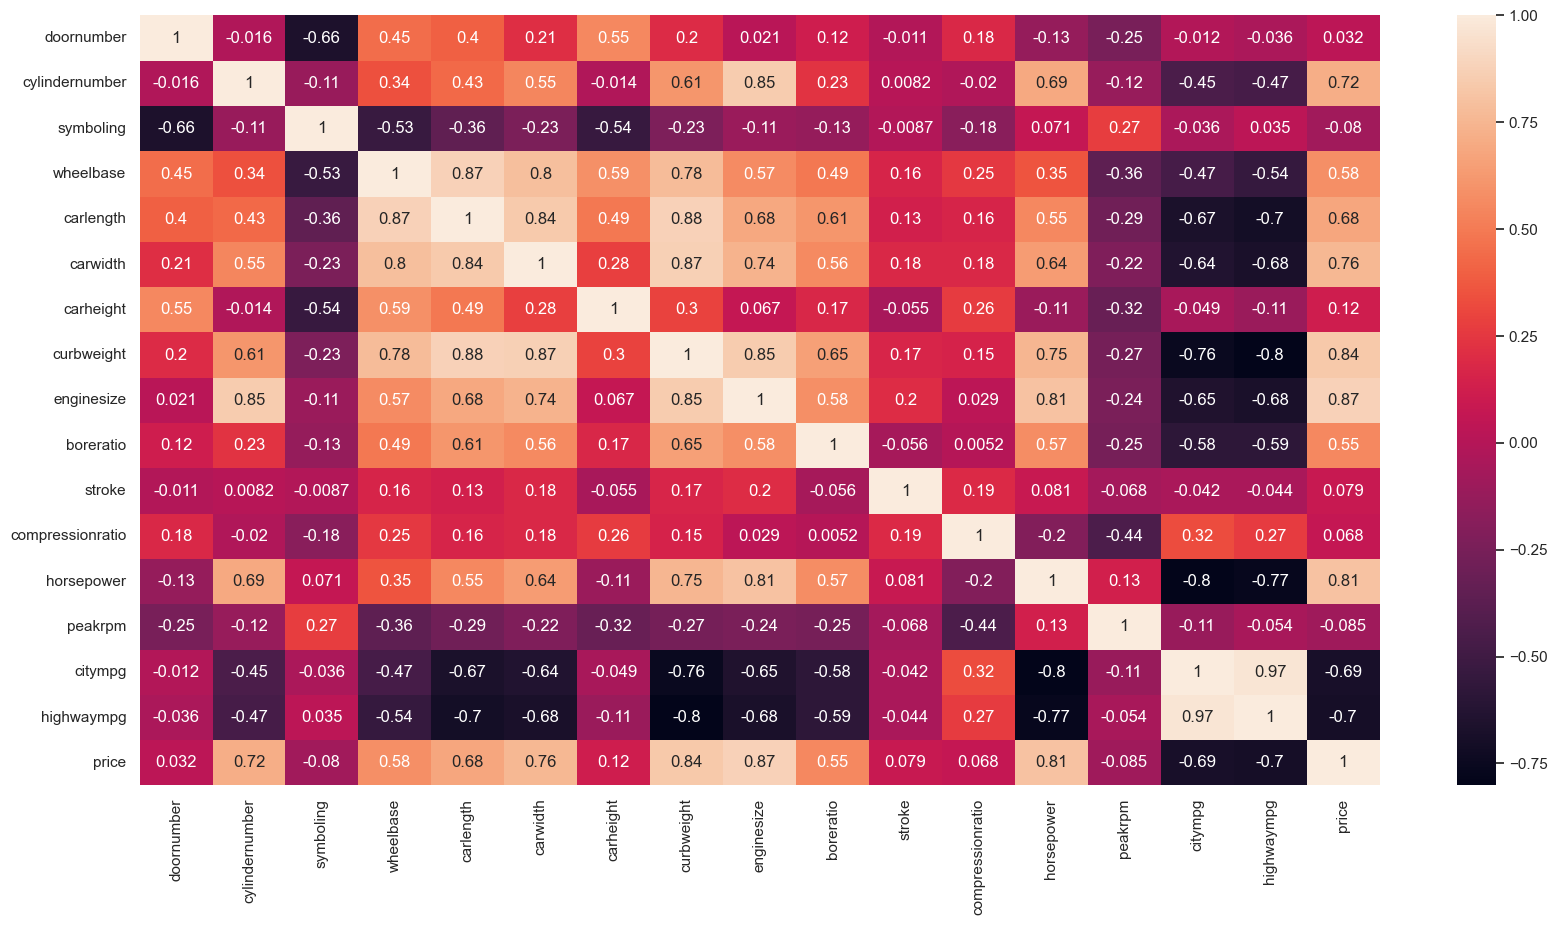

In [5]:
# Correlación de variables

columnas_numericas = ['doornumber', 'cylindernumber', 'symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
corr_coef = np.corrcoef(data[columnas_numericas].values.T)
plt.figure(figsize=(20, 10))
sns.set(font_scale=1)
sns.heatmap(
    corr_coef,
    annot=True,
    yticklabels=columnas_numericas,
    xticklabels=columnas_numericas
)

In [6]:
correlation_matrix = data.corr()
target_correlation = correlation_matrix['price']

# Excluir la correlación con la variable 'price' y consultar las varibles con mayor correlación con el precio
top_correlations = target_correlation.drop('price').abs().sort_values(ascending=False).head(5)

print(top_correlations.index)
print(top_correlations)

# Se obtienen las variables con las correlaciones más altas.

Index(['enginesize', 'curbweight', 'horsepower', 'carwidth', 'cylindernumber'], dtype='object')
enginesize        0.874145
curbweight        0.835305
horsepower        0.808139
carwidth          0.759325
cylindernumber    0.718305
Name: price, dtype: float64


In [7]:
data.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'brand_name_AUDI', 'brand_name_BMW',
       'brand_name_BUICK', 'brand_name_CHEVROLET', 'brand_name_DODGE',
       'brand_name_HONDA', 'brand_name_ISUZU', 'brand_name_JAGUAR',
       'brand_name_MAZDA', 'brand_name_MERCURY', 'brand_name_MITSUBISHI',
       'brand_name_NISSAN', 'brand_name_PEUGEOT', 'brand_name_PLYMOUTH',
       'brand_name_PORSCHE', 'brand_name_RENAULT', 'brand_name_SAAB',
       'brand_name_SUBARU', 'brand_name_TOYOTA', 'brand_name_VOLKSWAGEN',
       'brand_name_VOLVO', 'fueltype_GAS', 'aspiration_TURBO',
       'carbody_HARDTOP', 'carbody_HATCHBACK', 'carbody_SEDAN',
       'carbody_WAGON', 'drivewheel_FWD', 'drivewheel_RWD',
       'enginelocation_REAR', 'enginetype_DOHCV', 'enginetype_L',
       'enginetype_OHC', '

## MODELO DE CLASIFICACIÓN KNN:

3. División del dataset en características (x) y variable objetivo (y):

In [8]:
VARS = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'brand_name_AUDI', 'brand_name_BMW',
       'brand_name_BUICK', 'brand_name_CHEVROLET', 'brand_name_DODGE',
       'brand_name_HONDA', 'brand_name_ISUZU', 'brand_name_JAGUAR',
       'brand_name_MAZDA', 'brand_name_MERCURY', 'brand_name_MITSUBISHI',
       'brand_name_NISSAN', 'brand_name_PEUGEOT', 'brand_name_PLYMOUTH',
       'brand_name_PORSCHE', 'brand_name_RENAULT', 'brand_name_SAAB',
       'brand_name_SUBARU', 'brand_name_TOYOTA', 'brand_name_VOLKSWAGEN',
       'brand_name_VOLVO', 'fueltype_GAS', 'aspiration_TURBO',
       'carbody_HARDTOP', 'carbody_HATCHBACK', 'carbody_SEDAN',
       'carbody_WAGON', 'drivewheel_FWD', 'drivewheel_RWD',
       'enginelocation_REAR', 'enginetype_DOHCV', 'enginetype_L',
       'enginetype_OHC', 'enginetype_OHCF', 'enginetype_OHCV',
       'enginetype_ROTOR', 'fuelsystem_2BBL', 'fuelsystem_4BBL',
       'fuelsystem_IDI', 'fuelsystem_MFI', 'fuelsystem_MPFI',
       'fuelsystem_SPDI', 'fuelsystem_SPFI']
TARGET = ['price_category']

X = data[VARS]
y = data[TARGET]

4. División de datos de entrenamiento y testeo, escalamiento de datos, reducción de dimensionalidad, ajuste de hiperparámetros y modelamiento:

In [9]:
warnings.filterwarnings('ignore') #Ignorar advertencias

# División y Entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Crear un selector de características y aplicarlo a los conjuntos de entrenamiento y prueba
skb = SelectKBest(score_func=f_classif, k=5)
X_train_selected = skb.fit_transform(X_train, y_train)
X_test_selected = skb.transform(X_test)

# Obtener las características seleccionadas (las mejores dimensiones o características para el modelo)
selected_features = skb.get_support()

# Obtener los nombres de las características seleccionadas
selected_feature_names = X.columns[selected_features].tolist()

# Escalar características seleccionadas
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Definir el modelo
knn = KNeighborsClassifier()

# Definir los hiperparámetros a ajustar y sus posibles valores
param_grid = {
    'n_neighbors': list(range(3, len(X_train_selected_scaled)//2 + 1)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='recall') # se cambia scoring='accuracy' por 'recall' para disminuir la exhaustividad
grid_search.fit(X_train_selected_scaled, y_train)

# Obtener los mejores hiperparámetros y el modelo ajustado
best_params_grid = grid_search.best_params_
best_model_grid = grid_search.best_estimator_

# Imprimir los nombres de las características seleccionadas y los mejores hiperparámetros
print("Nombres de características seleccionadas:")
print(selected_feature_names)
print("Mejores hiperparámetros (GridSearchCV):")
print(best_params_grid)

Nombres de características seleccionadas:
['carlength', 'curbweight', 'citympg', 'highwaympg', 'fuelsystem_2BBL']
Mejores hiperparámetros (GridSearchCV):
{'algorithm': 'auto', 'n_neighbors': 35, 'weights': 'uniform'}


In [10]:
print(best_model_grid)
print(f"Mejor precisión durante la validación cruzada: {grid_search.best_score_:.2f}")
print(selected_feature_names)

KNeighborsClassifier(n_neighbors=35)
Mejor precisión durante la validación cruzada: 0.95
['carlength', 'curbweight', 'citympg', 'highwaympg', 'fuelsystem_2BBL']


5. Matrix de Confusión:

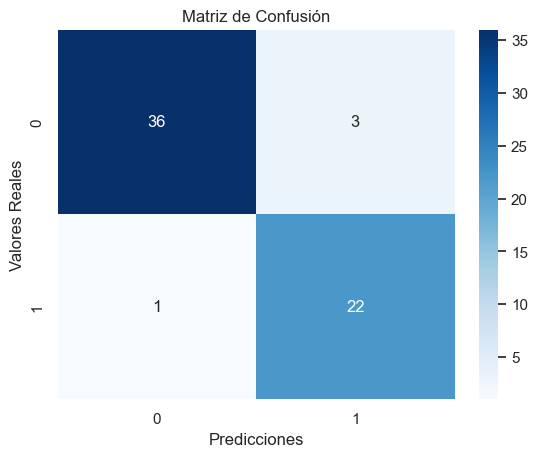

In [11]:
# Realizar predicciones en el conjunto de prueba con el mejor modelo de la búsqueda de cuadrícula
y_pred = best_model_grid.predict(X_test_selected_scaled)


# Obtener la matriz de confusión para el conjunto de prueba
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor con seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

In [12]:
print('accuracy = ',accuracy_score(y_test, y_pred))
print('sensibilidad = ',recall_score(y_test, y_pred, pos_label = 1))
print('especificidad = ',recall_score(y_test, y_pred, pos_label = 0))

accuracy =  0.9354838709677419
sensibilidad =  0.9565217391304348
especificidad =  0.9230769230769231


6. Pronosticar un nuevo resultado de prueba:

In [14]:
#'carlength', 'curbweight', 'citympg', 'highwaympg', 'fuelsystem_2BBL' << Estos son las mejores características del modelo

# Probar modelo con una nueva entrada
nueva_entrada = [168, 2548, 21, 27, 0]
# Escalar las características seleccionadas
nueva_entrada_scaled = scaler.transform([nueva_entrada])

# Realizar la predicción con el modelo ajustado
prediccion = best_model_grid.predict(nueva_entrada_scaled)

# Imprimir la predicción
print("Predicción para la nueva entrada:", prediccion)

Predicción para la nueva entrada: [1]


In [15]:
data[['carlength', 'curbweight', 'citympg', 'highwaympg', 'fuelsystem_2BBL','price_category']].iloc[1]

carlength           168.8
curbweight         2548.0
citympg              21.0
highwaympg           27.0
fuelsystem_2BBL       0.0
price_category        1.0
Name: 1, dtype: float64

7. Validación cruzada LOOCV:

In [16]:
warnings.filterwarnings('ignore') #Ignorar advertencias
loo = LeaveOneOut()
accuracy_scores_loo = cross_val_score(best_model_grid, X_test_selected_scaled, y_test, cv=loo, scoring='accuracy')

In [17]:
# Datos de la validación:

print("Puntuaciones de Precisión LOOCV:")
print(accuracy_scores_loo)

# Imprimir la Precisión Promedio
average_accuracy_loo = accuracy_scores_loo.mean()
print(f'Precisión promedio LOOCV: {average_accuracy_loo:.2f}')

Puntuaciones de Precisión LOOCV:
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Precisión promedio LOOCV: 0.92


8. Resumen del modelo de claisificación:

| characteristic  | detail |
|-----------------|--------------------|
| Modelo          | K_Nearest_Neighbor |
| n_neighbors     | 35                  |
| weights         | uniform          |
| accuracy        | 0.94              |
| sensibilidad    | 0.96              |
| especificidad   | 0.92               |
| validación LOOCV   | 0.92              |

*Nota:* `n_neighbors` (k) optimizado mediante grid_search sobre la valoración de 3 hasta la mitad de los registros.


## MODELO DE REGRESIÓN KNN:

9. División del dataset en características 'x' y variable objetivo 'y':

In [18]:
VARSr = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'brand_name_AUDI', 'brand_name_BMW',
       'brand_name_BUICK', 'brand_name_CHEVROLET', 'brand_name_DODGE',
       'brand_name_HONDA', 'brand_name_ISUZU', 'brand_name_JAGUAR',
       'brand_name_MAZDA', 'brand_name_MERCURY', 'brand_name_MITSUBISHI',
       'brand_name_NISSAN', 'brand_name_PEUGEOT', 'brand_name_PLYMOUTH',
       'brand_name_PORSCHE', 'brand_name_RENAULT', 'brand_name_SAAB',
       'brand_name_SUBARU', 'brand_name_TOYOTA', 'brand_name_VOLKSWAGEN',
       'brand_name_VOLVO', 'fueltype_GAS', 'aspiration_TURBO',
       'carbody_HARDTOP', 'carbody_HATCHBACK', 'carbody_SEDAN',
       'carbody_WAGON', 'drivewheel_FWD', 'drivewheel_RWD',
       'enginelocation_REAR', 'enginetype_DOHCV', 'enginetype_L',
       'enginetype_OHC', 'enginetype_OHCF', 'enginetype_OHCV',
       'enginetype_ROTOR', 'fuelsystem_2BBL', 'fuelsystem_4BBL',
       'fuelsystem_IDI', 'fuelsystem_MFI', 'fuelsystem_MPFI',
       'fuelsystem_SPDI', 'fuelsystem_SPFI']
       
TARGETr = ['price']

Xr = data[VARSr]
yr = data[TARGETr]

10. División de datos de entrenamiento y testeo, escalamiento de datos, reducción de dimensionalidad, ajuste de hiperparámetros y modelamiento:

In [19]:

# División y Entrenamiento
X_trainr, X_testr, y_trainr, y_testr = train_test_split(Xr, yr, test_size=0.3, random_state=123)

# Crear un selector de características y aplicarlo a los conjuntos de entrenamiento y prueba
skbr = SelectKBest(score_func=f_regression, k=5)  # Utilizamos f_regression para un problema de regresión
X_train_selectedr = skbr.fit_transform(X_trainr, y_trainr)
X_test_selectedr = skbr.transform(X_testr)

# Obtener las características seleccionadas
selected_featuresr = skbr.get_support()

# Obtener los nombres de las características seleccionadas
selected_feature_namesr = Xr.columns[selected_featuresr].tolist()

# Imprimir los nombres de las características seleccionadas
print("Nombres de características seleccionadas:")
print(selected_feature_namesr)

# Escalar características seleccionadas
scalerr = StandardScaler()
X_train_selected_scaledr = scalerr.fit_transform(X_train_selectedr)
X_test_selected_scaledr = scalerr.transform(X_test_selectedr)

# Definir el modelo KNN para regresión
knn_regressor = KNeighborsRegressor()

# Definir los hiperparámetros a ajustar y sus posibles valores
param_grid_regressor = {
    'n_neighbors': list(range(3, len(X_train_selected_scaledr)//2 + 1)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Realizar la búsqueda de cuadrícula para regresión
grid_search_regressor = GridSearchCV(knn_regressor, param_grid_regressor, cv=5, scoring='neg_mean_squared_error')
grid_search_regressor.fit(X_train_selected_scaledr, y_trainr)

# Obtener los mejores hiperparámetros y el modelo ajustado para regresión
best_params_grid_regressor = grid_search_regressor.best_params_
best_model_grid_regressor = grid_search_regressor.best_estimator_

# Imprimir los nombres de las características seleccionadas y los mejores hiperparámetros
print("Nombres de características seleccionadas:")
print(selected_feature_namesr)
print("Mejores hiperparámetros (GridSearchCV - Regresión):")
print(best_params_grid_regressor)

best_model_grid_regressor

Nombres de características seleccionadas:
['carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'horsepower']
Nombres de características seleccionadas:
['carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'horsepower']
Mejores hiperparámetros (GridSearchCV - Regresión):
{'algorithm': 'brute', 'n_neighbors': 3, 'weights': 'distance'}


KNeighborsRegressor(algorithm='brute', n_neighbors=3, weights='distance')

In [20]:
# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros (GridSearchCV - Regresión):")
print(best_params_grid_regressor)

# Imprimir la mejor puntuación durante la validación cruzada (neg_mean_squared_error)
print(f"Mejor puntuación durante la validación cruzada: {grid_search_regressor.best_score_:.2f}")


Mejores hiperparámetros (GridSearchCV - Regresión):
{'algorithm': 'brute', 'n_neighbors': 3, 'weights': 'distance'}
Mejor puntuación durante la validación cruzada: -7637500.02


11. Evaluación del modelo correlación (R^2) entre los valores reales del testeo y las predicciones:

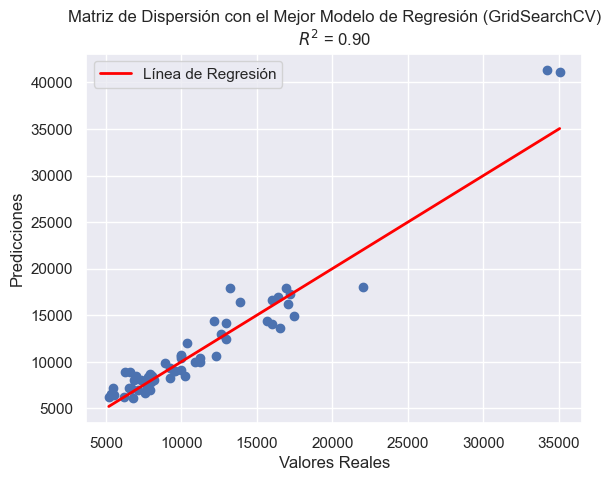

In [21]:
# Realizar predicciones en el conjunto de prueba con el mejor modelo de la búsqueda de cuadrícula
y_predr = best_model_grid_regressor.predict(X_test_selected_scaledr)

# Convertir los datos a tipo numérico si es necesario
y_testr = y_testr.astype(float)
predictions_regression = y_predr.astype(float)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_testr, predictions_regression)

# Crear una línea de regresión
line = np.arange(min(y_testr['price']), max(y_testr['price']), 1)
line = line.reshape(-1, 1)
#regression_line = best_model_grid_regressor.predict(scalerr.transform(line))

# Visualizar la matriz de dispersión con la línea de regresión y el R^2
plt.scatter(y_testr, predictions_regression)
plt.plot(line, line, color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title(f'Matriz de Dispersión con el Mejor Modelo de Regresión (GridSearchCV)\n$R^2$ = {r2:.2f}')
plt.legend()
plt.show()




12. Pronosticar un nuevo dato de prueba:

In [22]:
'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'horsepower'

# Supongamos que tienes una nueva entrada representada por una fila de características seleccionadas
nueva_entradar = [64.1, 2548, 4, 130, 111]  # Asegúrate de que tiene las mismas características y en el mismo orden que las características seleccionadas

# Escala las características seleccionadas
nueva_entrada_scaledr = scalerr.transform([nueva_entradar])

# Realiza la predicción con el modelo ajustado
prediccionr = best_model_grid_regressor.predict(nueva_entrada_scaledr)

# Imprime la predicción
print("Predicción para la nueva entrada:", prediccionr)

Predicción para la nueva entrada: [[14997.5]]


In [23]:
data[['carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'horsepower','price']]

,carwidth,curbweight,cylindernumber,enginesize,horsepower,price
0,64.1,2548,4,130,111,13495.0
1,64.1,2548,4,130,111,16500.0
2,65.5,2823,6,152,154,16500.0
3,66.2,2337,4,109,102,13950.0
4,66.4,2824,5,136,115,17450.0
...,...,...,...,...,...,...
200,68.9,2952,4,141,114,16845.0
201,68.8,3049,4,141,160,19045.0
202,68.9,3012,6,173,134,21485.0
203,68.9,3217,6,145,106,22470.0


13. Resumen métricas de evaluación del modelo de regresión:

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_testr, predictions_regression)

# Calcular la raíz cuadrada del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_testr, predictions_regression)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_testr, predictions_regression)

# Imprimir las métricas
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz Cuadrada del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")


Error Cuadrático Medio (MSE): 3300775.72
Raíz Cuadrada del Error Cuadrático Medio (RMSE): 1816.80
Error Absoluto Medio (MAE): 1214.09
Coeficiente de Determinación (R^2): 0.90


14. Validación Cruzada 'neg_mean_squared_error':

In [25]:
loo = LeaveOneOut()
mse_scores_loo = cross_val_score(best_model_grid_regressor, X_test_selected_scaledr, y_testr, cv=loo, scoring='neg_mean_squared_error')

# Convertir las puntuaciones de error cuadrático medio negativo a positivo
mse_scores_loo = -mse_scores_loo

# Imprimir las puntuaciones de MSE LOOCV
print("Puntuaciones de MSE LOOCV:")
print(mse_scores_loo)

# Calcular el MSE promedio
average_mse_loo = mse_scores_loo.mean()
print(f'MSE promedio LOOCV: {average_mse_loo:.2f}')


Puntuaciones de MSE LOOCV:
[1.59302676e+06 3.42651237e+07 7.84259001e+06 1.21000000e+04
 1.41900284e+05 1.21000000e+04 2.03506624e+05 1.48176082e+05
 8.73657095e+05 5.73867718e+04 7.96649923e+02 1.90367154e+07
 1.42586574e+06 2.86861818e+06 1.46996160e+06 8.42875451e+04
 4.51866468e+04 3.97821394e+06 1.30537112e+05 2.46610654e+05
 1.40836283e+07 3.25510592e+05 9.06129976e+03 3.80911490e+05
 1.03719879e+07 1.31353175e+06 5.49616228e+05 6.62555222e-08
 1.56844042e+07 5.29031082e+05 5.52167887e+05 2.21485196e+05
 2.09300084e+06 7.66796737e+05 2.73389038e+07 6.35084231e+05
 7.40407967e+05 1.79565122e+06 2.17382653e+06 8.56149188e+06
 3.05753584e+05 4.31827963e+06 8.85648739e+06 2.30024525e+05
 9.37991623e+05 3.31107833e+04 6.44572567e+05 7.17576265e+05
 4.05107491e+06 3.46261235e+06 6.14758745e+06 1.61973297e+06
 7.50265625e+05 6.69763560e+06 6.68646646e+07 2.07853631e+03
 6.62555222e-08 3.32709064e+05 6.46991635e+05 1.93370340e+03
 1.02376468e+06 1.07755226e+05]
MSE promedio LOOCV: 435992

15. Resumen del modelo de regresión:

| characteristic  | detail |
|-----------------|--------------------|
| Modelo          | K_Nearest_Neighbor |
| n_neighbors     | 3                  |
| weights         | distance           |
| algorithm       | bruto         |
| scoring_type    | neg_mean_squared_error|
| scoring_value   | -7637500.02|
| MSE   |3300775.72|
| RMSE   |1816.80|
| MAE   |1214.09|
| R^2 (texts vs Predictions) |0.90|
| MSE (validación cruzada - texts) |4359926.82|

*Nota:* `n_neighbors` (k) optimizado mediante grid_search sobre la valoración de 3 hasta la mitad de los registros.


scoring='neg_mean_squared_error'

--------------------------------------------------------------------------------------------------------

### RESUMEN GENERAL MODELO DE MACHINE LEARNING KNN (K-Nearest-Neighbor):

Se tiene un dataset de vehículos en el mercado con precios que pueden depender de las características como tamaño del motor, cilindraje, consumo de combustible, etc. Se debe construir un modelo capaz de pronosticar el precio del vehículo (modelo de regresión) y otro modelo capaz de clasificar los vehículos en caros y costosos (modelo de clasificación) con estas características. Se realizan diferentes pruebas para los dos modelos usando KNN (K-Nearest-Neighbor):

1. Aspectos genereales de las pruebas KNN:
   
- Se utilizan los datos de "DatasetForML.csv" que resulta del tratamiento del documento original "DataWithGama.csv" realizado en las operaciones ejecutadas en el notebock "ETLPropuesta2.ipynb"el cual ya tiene todas las transformaciones necesarias (codificación de variables categóricas, eliminación de columnas, cambio de textos a números, etc).
- Se entrenan todos los modelos con el 70% de los datos y se realizan pruebas con el 30% restante.
- Se genera modelo KNN de clasificación y regresión (cada prueba contiene sus própios aspectos específicos).
- Para todas las pruebas se usa "GridSearchCV" para encontrar los mejores hiperparámetros variando "K" de 3 hasta el número que representa la mitad de los registros (esto porque de antemano se sabe que al usar la mediana del precio el dataset original queda dividido en dos partes iguales entre vehículos caros y económicos).
- Para las pruebas de clasificación KNN se realizó matrix de confusión y accuracy como indicador de presición y exactitud del modelo.
- Para las pruebas de de regresión  KNN se mide el error cuadrático medio y el coeficiente de correlación R^2 para determinar la presición y exactitud del modelo.
- Al realizar pruebas, se concluye que para los modelos de clasificación se debe usar el parámetro scoring='recall' en la búsquedas de las grillas para los mejores hiperparámetros para evitar que el modelo tenga alta exhaustividad (apreciada cuando se dejaba scoring='accuracy').
- Al finalizar se realiza validación cruzada para determinar la exactitud y reproducibilidad de los modelos KNN de caracterización y regresión; se usa accuracy para medir la exactitud en las clasificaciones y error cuadrático medio en las regresiones.
  
2. Aspectos específicos para las pruebas KNN:
   
- Se realiza una primer prueba registrada en el nortebook "KNN_All_Dim.ipynb" donde se usaron todas las variables (dimensiones) del dataset. Luego de varias pruebas se concluye que se obtienen mejores resultados sin escalar las variables numéricas.
- La segunda prueba se registra en el notebook "KNN_Cor_Dim.ipynb" donde se busca inicialmente las 10 características que tienen el coeficiente de correlación más alto. Se toma la primer característica encontrada y se verifica su correlación con las demás dimensiones eliminando aquellas que se encontraron en la primer búsqueda (si están en el top 5 de la segunda búsqueda).
- La tercer prueba se utiliza SelectBest con K=5 para encontrar las 5 mejores características y utilizarlas en el modelo.

3. Resultados obtenidos en las pruebas para el modelo de clasificación:
   
KNN_All_Dim:
| characteristic  | detail |
|-----------------|--------------------|
| Modelo          | K_Nearest_Neighbor |
| n_neighbors     | 3                  |
| weights         | distance           |
| accuracy        | 0.90               |
| sensibilidad    | 0.83               |
| especificidad   | 0.95               |
| validación LOOCV   | 0.89              |

Oservación: El modelo presenta buena reproducibilidad ya que la validación es cercana al accuracy inicial y su resultado es aceptable. Pero debido a que se utilizan todos las dimensiones se puede incurrir en un sobreajuste y genera más trabajo computacional.

KNN_Cor_Dim:
| characteristic  | detail |
|-----------------|--------------------|
| Modelo          | K_Nearest_Neighbor |
| n_neighbors     | 9                 |
| weights         | uniform           |
| accuracy        | 0.85               |
| sensibilidad    | 0.74               |
| especificidad   | 0.92               |
| validación LOOCV   | 0.87              |

Oservación: Del mismo modo presenta buena reproducibilidad aunque con menor presición al anterior, pero con la ventaja de usar solo 6 dimensiones disminuyendo la probabilidad de sobreajuste mejorando los tiempso de respuesta del modelo.

KNN_SelectBest_Dim:
| characteristic  | detail |
|-----------------|--------------------|
| Modelo          | K_Nearest_Neighbor |
| n_neighbors     | 35                  |
| weights         | uniform          |
| accuracy        | 0.94              |
| sensibilidad    | 0.96              |
| especificidad   | 0.92               |
| validación LOOCV   | 0.92              |

Oservación: Es el mejor modelo entre los evaluados, seleccionando automáticamente las 5 mejores características y mejorando notablemente la exactitud y reproducibilidad.

4. Resultados obtenidos en las pruebas para el modelo de regresión:

KNN_All_Dim:
| characteristic  | detail |
|-----------------|--------------------|
| Modelo          | K_Nearest_Neighbor |
| n_neighbors     | 3                  |
| weights         | distance           |
| algorithm       | ball_tree          |
| scoring_type    | neg_mean_squared_error|
| scoring_value   | -9523245.77|
| MSE   |6291026.24|
| RMSE   |2508.19|
| MAE   |1553.91|
| R^2 (texts vs Predictions) |0.81|
| MSE (validación cruzada - texts) |4162851.92|

Oservación: Aunque el coeficiente R^2 manidfiesta que hay una fuerte correlación entre los datos pronosticados y reales en los datos de testeo, el uso de todas las dimensiones puede generar sobreajuste y podría representar un mayor trabajo computacional. Sin embargo, se aprecia buena reproducibilidad del modelo al comparar el MSE inicial con los datos de validación.

KNN_Cor_Dim:
| characteristic  | detail |
|-----------------|--------------------|
| Modelo          | K_Nearest_Neighbor |
| n_neighbors     | 5                  |
| weights         | distance           |
| algorithm       | ball_tree          |
| scoring_type    | neg_mean_squared_error|
| scoring_value   | -7762139.09|
| MSE   |6511452.22|
| RMSE   |2551.75|
| MAE   |1563.53|
| R^2 (texts vs Predictions) |0.80|
| MSE (validación cruzada - texts) |11743067.17|


Oservación: Se mantiene la correlación entre los datos de prueba y pronóstico con respecto del modelo anterior, pero no se aprecia buena reproducibilidad en datos nuevos, según la validación cruzada.

KNN_SelectBest_Dim:
| characteristic  | detail |
|-----------------|--------------------|
| Modelo          | K_Nearest_Neighbor |
| n_neighbors     | 3                  |
| weights         | distance           |
| algorithm       | bruto         |
| scoring_type    | neg_mean_squared_error|
| scoring_value   | -7637500.02|
| MSE   |3300775.72|
| RMSE   |1816.80|
| MAE   |1214.09|
| R^2 (texts vs Predictions) |0.90|
| MSE (validación cruzada - texts) |4359926.82|

Oservación: Es el mejor modelo entre los evaluados, seleccionando automáticamente las 5 mejores características y mejorando notablemente la exactitud y reproducibilidad.

5.  Recomendaciones:
   
   - Si se desea usar KNN para predecir el precio y clasificar los vehículos en costosos y económicos, usar SelectBest para encontrar las mejores características y en el parámetro scoring='recall' al usar GridSearchCV para encontrar los mejores hiperparámetros del modelo de clasificación.
   - Realizar pruebas con modelos diferentes a KNN.